# kNN - Experimento variando K y tamaño de imagenes


Definir los path al ejecutable de python 3.6 y sus librerías,
de acuerdo al virtual env que estén corriendo.

In [1]:
!cd .. && ./build.sh

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc - works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ - works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/ignacio/.local/share/virtualenvs/metnum/bin/python (found version "3.8.2") 
-- Found PythonLibs: /usr/lib/libpython3.8.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/ignacio/Documents/Facultad/metnum-tp2
-- Configuring done
-- Gene

## Explorando los datos

In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd

df_orig = pd.read_csv("../data/train.csv")
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


### Reducir el dataset

Ya que el dataset es grande, me quedo con una porción de éste

**<font color=red>ESTO ES SOLO PARA HACER PRUEBAS. CUANDO REPORTEN LOS RESULTADOS, USAR DATASET COMPLETO</font>**

In [3]:
df_orig.sample(frac=1, random_state=2020)

def slice(n):
    df_train = df_orig.copy()[:n]
    X = df_train[df_train.columns[1:]].values
    y = df_train["label"].values.reshape(-1, 1)
    
    return X, y


In [4]:
class KNNnPCAClassifier:
    def __init__(self, k, alpha):
        self.knn_classifier = metnum.KNNClassifier(k, "distance_pow")
        self.pca = metnum.PCA(alpha)

    def fit(self, X_train, y_train):
        self.pca.fit(X_train)
        self.knn_classifier.fit(self.pca.transform(X_train), y_train)
    
    def predict(self, X):
        return self.knn_classifier.predict(self.pca.transform(X))

### Experimento

In [5]:
import metnum
import pandas as pd

from scoring import metrics
from scoring import cross_validation as cv
from tqdm import tqdm

scoring_fns = {
    "accuracy":  metrics.accuracy_score,
    "recall":    metrics.recall_score,
    "precision": metrics.precision_score,
    "f1":        metrics.f1_score,
}

K_FOLD_VALUES = [2, 4, 8, 10, 12, 16, 20, 40]
X_SIZES = [500, 1000, 2500, 5000, 8000, 10000, 25000, 42000]
#LABEL = "kNN_distance_pow"
#LABEL = "kNN_uniform+PCA"
LABEL = "kNN_distance_pow_PCA"

rows = []
clf = KNNnPCAClassifier(6, 33)
for K in tqdm(K_FOLD_VALUES, "Ks"):
    for size in X_SIZES:
        X, y = slice(size)
        scores = cv.cross_validate_fns(clf, X, y, scoring_fns, K)

        # scores es un dict con las keys de scoring_fns, que son las
        # mismas que las columnas del dataframe.
        rows.append({
            **{
                "label": LABEL,
                "K": K,
                "sample_size": size,
            }, 
            **scores
        })

print("Creating DataFrame...")
df = pd.DataFrame(rows, columns=["label", "K", "sample_size", "accuracy", "recall", "precision", "f1"])

print("Finished!")

Ks: 100%|██████████| 8/8 [1:15:55<00:00, 569.41s/it]

Creating DataFrame...
Finished!


In [6]:
df.sort_values("accuracy", ascending=False)

,label,K,sample_size,accuracy,recall,precision,f1
63,kNN_distance_pow_PCA,40,42000,0.977643,0.977395,0.977605,0.977383
55,kNN_distance_pow_PCA,20,42000,0.977476,0.977242,0.977467,0.977284
47,kNN_distance_pow_PCA,16,42000,0.977071,0.976901,0.977153,0.976963
39,kNN_distance_pow_PCA,12,42000,0.977048,0.976856,0.977114,0.976927
31,kNN_distance_pow_PCA,10,42000,0.976976,0.976768,0.977022,0.976850
23,kNN_distance_pow_PCA,8,42000,0.976571,0.976411,0.976607,0.976463
15,kNN_distance_pow_PCA,4,42000,0.975143,0.974944,0.975131,0.975002
54,kNN_distance_pow_PCA,20,25000,0.973680,0.973605,0.973581,0.973477
62,kNN_distance_pow_PCA,40,25000,0.973600,0.973489,0.973419,0.973245
38,kNN_distance_pow_PCA,12,25000,0.973516,0.973384,0.973431,0.973330


In [7]:
df.to_csv("data/pca/variaciones/knn_pca_variations_distance_pow.csv", index=False)

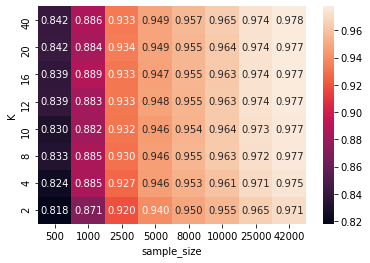

In [9]:
## concluimos que distance_pow es el mejor
## TODO: graficar cosas
import seaborn as sns
df_pivot = df.pivot("K", "sample_size", "accuracy")
ax = sns.heatmap(data=df_pivot, annot=True, fmt=".3f")
ax.invert_yaxis()